A link to the online notebook is here: 
https://github.com/thetruejacob/CS112/blob/master/Assignment/Causal%20Inference%20Assignment/Causal%20Inference%20Assignment.ipynb

## Debugging
In the 3 cases below (a through c), identify the major coding error in each case and explain how to fix it, in 1-2 
sentences. DO NOT actually copy/paste corrected code:

1. https://gist.github.com/diamonaj/2e5d5ba5226b7b9760f5d1bf1e7bf765
2. https://gist.github.com/diamonaj/3b6bc83d040098486634184d99fc4c55
3. https://gist.github.com/diamonaj/a88cb40132ed8584e5182b585e1c84c8

1. The problem is that Match was never run, and so instead of the Match object being fed into the the MatchBalance function, the GenMatch object was incorrectly used instead.
2. There is a mismatch between the 'ATE' specified in the GenMatch function and the default 'ATT' in the Match function. This can be fixed by specifying 'ATE' in the Match function.
3. There is a mistmatch between the M = 2 in the Match function and the default M = 1 in the GenMatch function. This can fixed by making both specifications of M equivalent. Secondly, Y should only be included as an argument in Match after covariate balance has been established. It is unclear if this was done prior, and so this may not necessarily be a mistake.

## Replication
Replicate figure 8 in https://gking.harvard.edu/files/counterf.pdf.

A few suggestions:
- Read the class breakout instructions above to get the data and relevant columns,
- If you are not clear on the model, read the relevant sections of the paper and focus on understanding Table 2;
- To plot the figure, you should use a strategy similar to the one we used in the statistics scavenger hunt, which was also used
  in a previous assignment (e.g., holding predictors at their medians and looping through values of one variable to obtain treatment
  effects at different levels of the variable--you may want to review the answer key for that previous assignment, but please note
  that you WON'T have to simulate coefficients this time because there is no need to estimate uncertainty e.g., intervals).  
	However, you don't need to simulate coefficients this time.

In [1]:
foo <- read.csv("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00086677-3767/peace.csv")
foo <- foo[c(-19, -47), ]
head(foo)

X,dataset,ccode,cnumb,cluster,clust2,cname,yrbeg,yrend,decade,⋯,L13,Phat13,L14,Phat14,L15,Phat15,L16,Phat16,L17,Phat17
1,8,AFG2,2,AFG,AFG,Afghanistan-Taliban,93,NA,5,⋯,-0.9587072,0.2771371,-2.8743596,0.05343571,1.3276421,0.7904503,-0.60545409,0.3530969,3.596548,0.9733135
2,1,AFG1,1,AFG,AFG,Afghanistan,78,92,4,⋯,-0.9591957,0.2770393,-3.2776146,0.03634718,0.9243872,0.7159352,-0.60594261,0.3529853,3.596059,0.9733008
3,9,MEX,88,MEX,MEX,Mexico,92,94,5,⋯,-0.1507243,0.4623901,1.4073639,0.80334985,5.6093655,0.9963500,0.20252874,0.5504598,4.404531,0.9879257
4,1,RUS,109,RUS,FSU,Russia-Chechnya,94,96,5,⋯,0.2437635,0.5606409,-1.8341390,0.13774595,2.3678627,0.9143436,0.59701657,0.6449735,4.799018,0.9918295
5,9,THA,123,THA,THA,Thailand-Commun.,67,85,3,⋯,-0.2880664,0.4284773,0.1764766,0.54400498,4.3784785,0.9876110,0.06518671,0.5162909,4.267189,0.9861727
6,1,CHD1,24,CHD,CHD,Chad,65,79,3,⋯,-1.0295979,0.2631621,-1.7538031,0.14756815,2.4481986,0.9204296,-0.67634487,0.3370776,3.525657,0.9714090


In [2]:
glm1 <- glm(pbs2s3 ~  wartype + logcost + wardur + factnum + factnum2 + trnsfcap + untype4 + treaty + develop + exp + decade,  data = foo, family = binomial)
summary(glm1)


Call:
glm(formula = pbs2s3 ~ wartype + logcost + wardur + factnum + 
    factnum2 + trnsfcap + untype4 + treaty + develop + exp + 
    decade, family = binomial, data = foo)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5438  -0.6184  -0.2655   0.4773   2.7049  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  8.6088620  2.1965592   3.919 8.88e-05 ***
wartype     -1.7420043  0.5966755  -2.920  0.00351 ** 
logcost     -0.4448499  0.1366487  -3.255  0.00113 ** 
wardur       0.0063857  0.0039946   1.599  0.10991    
factnum     -1.2589333  0.8257914  -1.525  0.12738    
factnum2     0.0616696  0.0930082   0.663  0.50730    
trnsfcap     0.0040934  0.0020585   1.989  0.04675 *  
untype4      3.1351843  1.4934804   2.099  0.03580 *  
treaty       2.1243681  0.7785943   2.728  0.00636 ** 
develop      0.0007901  0.0004655   1.697  0.08967 .  
exp         -6.0161789  3.5523605  -1.694  0.09035 .  
decade      -0.2987758  0.1925220  -

In [3]:
glm2 <- glm(pbs2s3 ~  wartype + logcost + wardur + factnum + 
                              factnum2 + trnsfcap + untype4 + 
treaty + develop + exp + decade + I(wardur*untype4),  data = foo, family = binomial)
summary(glm2)


Call:
glm(formula = pbs2s3 ~ wartype + logcost + wardur + factnum + 
    factnum2 + trnsfcap + untype4 + treaty + develop + exp + 
    decade + I(wardur * untype4), family = binomial, data = foo)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.6082  -0.2733   0.4336   2.6419  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          8.1892936  2.4675178   3.319 0.000904 ***
wartype             -1.6663860  0.5962554  -2.795 0.005194 ** 
logcost             -0.4371467  0.1361314  -3.211 0.001322 ** 
wardur               0.0055304  0.0041052   1.347 0.177922    
factnum             -1.0453757  1.1122909  -0.940 0.347300    
factnum2             0.0322828  0.1454713   0.222 0.824377    
trnsfcap             0.0040839  0.0021462   1.903 0.057054 .  
untype4              0.2616384  2.8207883   0.093 0.926099    
treaty               2.1262049  0.7726535   2.752 0.005926 ** 
develop              0.0007643  0.0004609   

In [4]:
attach(foo)
treat = data.frame(wartype = mean(wartype),
                  logcost = mean(logcost),
                  wardur = 1:350,
                  untype4 = 1,
                   factnum = mean(factnum),
                   factnum2 = mean(factnum2),
                   trnsfcap = mean(trnsfcap),
                   treaty = mean(treaty),
                   develop = mean(develop),
                   exp = mean(exp),
                   decade = mean(decade)
                  )
control = treat; control$untype4 = 0
head(treat)
head(control)

The following object is masked from package:datasets:

    euro



wartype,logcost,wardur,untype4,factnum,factnum2,trnsfcap,treaty,develop,exp,decade
0.6393443,11.90362,1,1,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,2,1,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,3,1,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,4,1,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,5,1,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,6,1,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541


wartype,logcost,wardur,untype4,factnum,factnum2,trnsfcap,treaty,develop,exp,decade
0.6393443,11.90362,1,0,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,2,0,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,3,0,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,4,0,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,5,0,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541
0.6393443,11.90362,6,0,3.336066,13.45082,58.66762,0.2868852,542.7804,0.1230395,3.47541


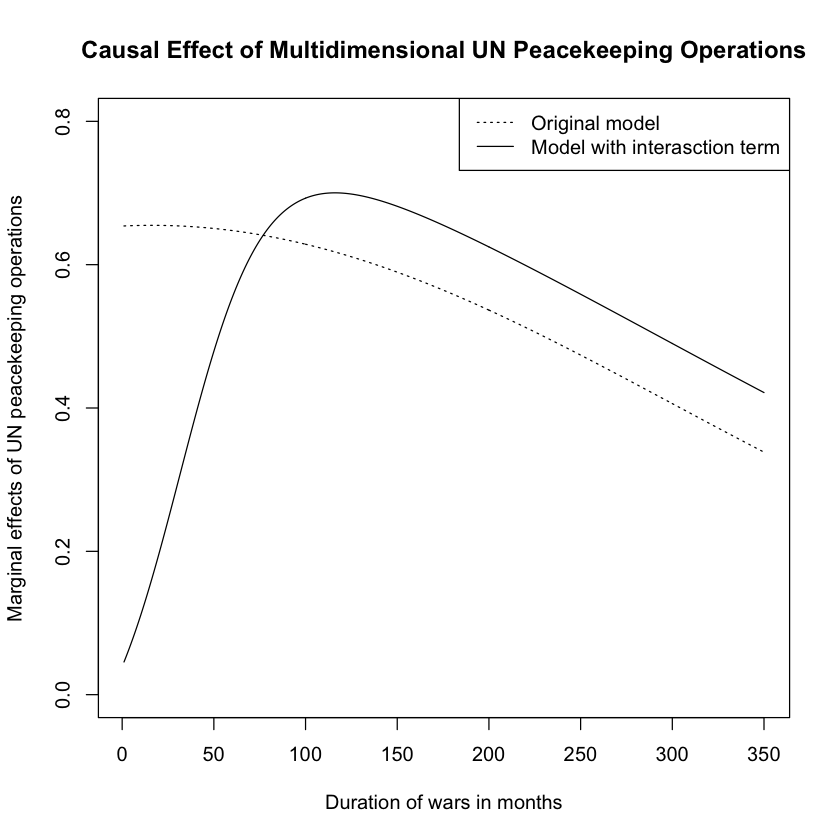

In [5]:
glm1treatpreds = predict(glm1, treat, type = "response")
glm2treatpreds = predict(glm2, treat, type = "response")
glm1controlpreds = predict(glm1, control, type = "response")
glm2controlpreds = predict(glm2, control, type = "response")


plot(treat$wardur, glm1treatpreds - glm1controlpreds, type = 'l', lty = 3, ylim = c(0,0.8),
    main = "Causal Effect of Multidimensional UN Peacekeeping Operations",
    xlab = "Duration of wars in months",
    ylab = "Marginal effects of UN peacekeeping operations")
lines(control$wardur, glm2treatpreds - glm2controlpreds)
legend('topright', legend = c("Original model", "Model with interasction term"), lty = c(3,1))

## Treatment Specification

In [6]:
Tr <- rep(0, length(foo$untype))
Tr[which(foo$untype != "None")] <- 1
# What does this mean? What is "treatment"? 
# Treatment means UN peacekeeping intervention

## Table of ATTs

1. In no more than 1 sentence, articulate the causal question as best you can (being as clear as you can about treatment and control):
2. In no more than 1 sentence, explain how/why SUTVA might be violated here. In no more than 1 additional sentence, explain how you 
could in theory use the "restrict" argument (in Match()/GenMatch()) to help address this potential problem.
3. Use simple logistic regression, propensity score matching, and genetic matching to try to answer these questions. 

1. By how much better or worse are countries who have recieved UN peacebuilding operations on the metric of lenient peacebuilding success 2 and 5 years into the future than if they not did not recieve peacebuilding operations?
2. In an increasingly globalist economy, the politics of any one country are rarely limited to the confines of a geographical border (for example, UN peacebuilding operations in one country can set a precedent making it easier for peacebuilding to be seen as the go-to solution for other similar cases). In theory, this could be mitigated by preventing two closely tied countries to be matched together, e.g. Austria and Germany.
3. See below.

In [107]:
## logistic regression - 2 years
library(Matching)

foo = cbind(foo, Tr)

glm2 = glm(pbs2l ~ Tr + wartype + logcost + wardur + factnum + factnum2 + trnsfcap +
           treaty + develop + exp + decade, data = foo, subset = !is.na(pbs2l), family = binomial)
glm2
mb2 = MatchBalance(Tr ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap +
           treaty + develop + exp + decade, data = foo, nboots = 500)


Call:  glm(formula = pbs2l ~ Tr + wartype + logcost + wardur + factnum + 
    factnum2 + trnsfcap + treaty + develop + exp + decade, family = binomial, 
    data = foo, subset = !is.na(pbs2l))

Coefficients:
(Intercept)           Tr      wartype      logcost       wardur      factnum  
  7.3711369    0.7130543   -1.5672612   -0.3127275    0.0032791   -0.9587863  
   factnum2     trnsfcap       treaty      develop          exp       decade  
  0.0501228    0.0042836    1.5459400    0.0001873   -4.8553044   -0.3374430  

Degrees of Freedom: 121 Total (i.e. Null);  110 Residual
Null Deviance:	    167 
Residual Deviance: 117.2 	AIC: 141.2


***** (V1) wartype *****
before matching:
mean treatment........ 0.63889 
mean control.......... 0.63953 
std mean diff......... -0.13261 

mean raw eQQ diff..... 0 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 0 

mean eCDF diff........ 0.000323 
med  eCDF diff........ 0.000323 
max  eCDF diff........ 0.00064599 

var ratio (Tr/Co)..... 1.0174 
T-test p-value........ 0.99468 


***** (V2) logcost *****
before matching:
mean treatment........ 12.904 
mean control.......... 11.485 
std mean diff......... 79.811 

mean raw eQQ diff..... 1.4788 
med  raw eQQ diff..... 1.1386 
max  raw eQQ diff..... 3.3142 

mean eCDF diff........ 0.16371 
med  eCDF diff........ 0.16085 
max  eCDF diff........ 0.30039 

var ratio (Tr/Co)..... 0.49056 
T-test p-value........ 0.00067727 
KS Bootstrap p-value.. 0.014 
KS Naive p-value...... 0.020516 
KS Statistic.......... 0.30039 


***** (V3) wardur *****
before matching:
mean treatment........ 78.083 
mean control.......... 80.198 
std mean diff......

In [84]:
## logistic regression - 5 years
glm5 = glm(pbs5l ~ Tr + wartype + logcost + wardur + factnum + factnum2 + trnsfcap + 
           treaty + develop + exp + decade, data = subset(foo, !is.na(pbs5l)), family = binomial)
glm5
mb5 = MatchBalance(Tr ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap +
           treaty + develop + exp + decade, data = subset(foo, !is.na(pbs5l)), nboots = 500)


Call:  glm(formula = pbs5l ~ Tr + wartype + logcost + wardur + factnum + 
    factnum2 + trnsfcap + treaty + develop + exp + decade, family = binomial, 
    data = subset(foo, !is.na(pbs5l)))

Coefficients:
(Intercept)           Tr      wartype      logcost       wardur      factnum  
  7.0355574    0.8233143   -1.7061721   -0.2483537    0.0036864   -1.1098129  
   factnum2     trnsfcap       treaty      develop          exp       decade  
  0.0603537    0.0043292    1.3278703    0.0002431   -4.9364476   -0.3071584  

Degrees of Freedom: 116 Total (i.e. Null);  105 Residual
Null Deviance:	    160.7 
Residual Deviance: 114 	AIC: 138


***** (V1) wartype *****
before matching:
mean treatment........ 0.69697 
mean control.......... 0.63095 
std mean diff......... 14.146 

mean raw eQQ diff..... 0.060606 
med  raw eQQ diff..... 0 
max  raw eQQ diff..... 1 

mean eCDF diff........ 0.033009 
med  eCDF diff........ 0.033009 
max  eCDF diff........ 0.066017 

var ratio (Tr/Co)..... 0.92424 
T-test p-value........ 0.49864 


***** (V2) logcost *****
before matching:
mean treatment........ 13.068 
mean control.......... 11.448 
std mean diff......... 98.484 

mean raw eQQ diff..... 1.7034 
med  raw eQQ diff..... 1.199 
max  raw eQQ diff..... 3.912 

mean eCDF diff........ 0.18876 
med  eCDF diff........ 0.18398 
max  eCDF diff........ 0.33658 

var ratio (Tr/Co)..... 0.41403 
T-test p-value........ 0.00010717 
KS Bootstrap p-value.. 0.006 
KS Naive p-value...... 0.0093267 
KS Statistic.......... 0.33658 


***** (V3) wardur *****
before matching:
mean treatment........ 83 
mean control.......... 78.393 
std mean diff.......

In [120]:
## propensity score matching - 2 years

glm.prop2 = glm(Tr ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap +  treaty + develop + exp + decade + I(wardur**2), data = foo, subset = !is.na(pbs2l), family = binomial)
mout.prop2 = Match(Tr = Tr[!is.na(foo$pbs2l)], X = glm.prop2$fitted.values, Y = foo$pbs2l, caliper = 0.2, M = 1)
mbprop2 = MatchBalance(Tr ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap + treaty + develop + exp + decade + I(wardur**2), data = foo, nboots = 500, match.out = mout.prop2)


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.63889 	 	    0.66667 
mean control..........    0.63953 	 	    0.89394 
std mean diff.........   -0.13261 	 	    -47.476 

mean raw eQQ diff.....          0 	 	    0.16216 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          1 

mean eCDF diff........   0.000323 	 	   0.081081 
med  eCDF diff........   0.000323 	 	   0.081081 
max  eCDF diff........ 0.00064599 	 	    0.16216 

var ratio (Tr/Co).....     1.0174 	 	     2.3438 
T-test p-value........    0.99468 	 	   0.044013 


***** (V2) logcost *****
                       Before Matching 	 	 After Matching
mean treatment........     12.904 	 	     12.747 
mean control..........     11.485 	 	     12.375 
std mean diff.........     79.811 	 	      20.96 

mean raw eQQ diff.....     1.4788 	 	    0.44013 
med  raw eQQ diff.....     1.1386 	 	     0.3517 
max  raw eQQ diff.....     

In [117]:
## propensity score matching - 5 years
glm.prop5 = glm(Tr ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap +  treaty + develop + exp + decade + I(wardur**2), data = foo, subset = !is.na(pbs5l), family = binomial)
mout.prop5 = Match(Tr = subset(foo, !is.na(pbs5l))$Tr, X = glm.prop5$fitted.values, caliper = 0.2, M = 1)
mbprop5 = MatchBalance(Tr ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap + treaty + develop + exp + decade + I(wardur**2), data = subset(foo, !is.na(pbs5l)), nboots = 500, match.out = mout.prop5)


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.69697 	 	    0.69697 
mean control..........    0.63095 	 	    0.84848 
std mean diff.........     14.146 	 	    -32.466 

mean raw eQQ diff.....   0.060606 	 	    0.15152 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          1 	 	          1 

mean eCDF diff........   0.033009 	 	   0.075758 
med  eCDF diff........   0.033009 	 	   0.075758 
max  eCDF diff........   0.066017 	 	    0.15152 

var ratio (Tr/Co).....    0.92424 	 	     1.6429 
T-test p-value........    0.49864 	 	    0.12805 


***** (V2) logcost *****
                       Before Matching 	 	 After Matching
mean treatment........     13.068 	 	     13.068 
mean control..........     11.448 	 	     13.283 
std mean diff.........     98.484 	 	    -13.039 

mean raw eQQ diff.....     1.7034 	 	    0.40037 
med  raw eQQ diff.....      1.199 	 	    0.35417 
max  raw eQQ diff.....     

In [87]:
## genetic matching - 2 years
genout2 = GenMatch(Tr = Tr, X = foo[,c('wartype', 'logcost', 'wardur', 'factnum', 'factnum2', 'trnsfcap', 'treaty', 'develop', 'exp', 'decade')], pop.size = 200, max.generations = 30, wait.generations = 10)
mout.gen2 = Match(Tr = Tr, X = foo[,c('wartype', 'logcost', 'wardur', 'factnum', 'factnum2', 'trnsfcap', 'treaty', 'develop', 'exp', 'decade')], Weight.matrix = genout2)
summary(mout.gen2)
mbgen2 = MatchBalance(Tr ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap + treaty + develop + exp + decade, data = foo, nboots = 500, match.out = mout.gen2)



Sun Dec  2 19:28:51 2018
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 30
Maximum N

In [122]:
## genetic matching - 5 years
genout5 = GenMatch(Tr = Tr[!is.na(foo$pbs5l)], X = foo[!is.na(foo$pbs5l), c('wartype', 'logcost', 'wardur', 'factnum', 'factnum2', 'trnsfcap', 'treaty', 'develop', 'exp', 'decade')], pop.size = 200, max.generations = 30, wait.generations = 10)
mout.gen5 = Match(Tr = Tr[!is.na(foo$pbs5l)], X = foo[!is.na(foo$pbs5l), c('wartype', 'logcost', 'wardur', 'factnum', 'factnum2', 'trnsfcap', 'treaty', 'develop', 'exp', 'decade')], Weight.matrix = genout5)
summary(mout.gen5)
mbgen5 = MatchBalance(Tr ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap + treaty + develop + exp + decade, data = subset(foo, !is.na(pbs5l)), nboots = 500, match.out = mout.gen5)



Sun Dec  2 19:48:53 2018
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 30
Maximum N

In [152]:
table = matrix(nrow = 9, ncol = 3)
colnames(table) = c(" tmt effect (bias adj)", "tmt effect (no bias adj)", "p-value (from MatchBalance)")
rownames(table) = c("logistic regression", "len success 2 years", "len success 5 years", 
                    "p- score matching", "len success 2 years", "len success 5 years", 
                    "gen match", "len success 2 years", "len success 5 years")
table[2,] = c("NA", glm2$coef[2], mb2$BMsmallest.p.value)
table[3,] = c("NA", glm5$coef[2], mb5$BMsmallest.p.value)
table[5,] = c(Match(Tr = Tr[!is.na(foo$pbs2l)], X = glm.prop2$fitted.values, Y = pbs2l[!is.na(foo$pbs2l)], caliper = 0.2, M = 1)$est,
              Match(Tr = Tr[!is.na(foo$pbs2l)], X = glm.prop2$fitted.values, Y = pbs2l[!is.na(foo$pbs2l)], caliper = 0.2, M = 1)$est.noadj,
             mbprop2$AMsmallest.p.value)
table[6,] = c(Match(Tr = Tr[!is.na(foo$pbs5l)], X = glm.prop5$fitted.values, Y = subset(foo, !is.na(pbs5l))$pbs5l, caliper = 0.2, M = 1)$est,
             Match(Tr = Tr[!is.na(foo$pbs5l)], X = glm.prop5$fitted.values, Y = subset(foo, !is.na(pbs5l))$pbs5l, caliper = 0.2, M = 1)$est.noadj,
             mbprop5$AMsmallest.p.value)
table[8,] = c(Match(Tr = Tr[!is.na(foo$pbs2l)], Y = pbs2l[!is.na(foo$pbs2l)], X = foo[!is.na(foo$pbs2l), c('wartype', 'logcost', 'wardur', 'factnum', 'factnum2', 'trnsfcap', 'treaty', 'develop', 'exp', 'decade')], Weight.matrix = genout2)$est,
             Match(Tr = Tr[!is.na(foo$pbs2l)], Y = pbs2l[!is.na(foo$pbs2l)], X = foo[!is.na(foo$pbs2l), c('wartype', 'logcost', 'wardur', 'factnum', 'factnum2', 'trnsfcap', 'treaty', 'develop', 'exp', 'decade')], Weight.matrix = genout2)$est.noadj,
             mbgen2$AMsmallest.p.value)
table[9,] = c(Match(Tr = Tr[!is.na(foo$pbs5l)], Y = pbs5l[!is.na(foo$pbs5l)], X = foo[!is.na(foo$pbs5l), c('wartype', 'logcost', 'wardur', 'factnum', 'factnum2', 'trnsfcap', 'treaty', 'develop', 'exp', 'decade')], Weight.matrix = genout5)$est,
             Match(Tr = Tr[!is.na(foo$pbs5l)], Y = pbs5l[!is.na(foo$pbs5l)], X = foo[!is.na(foo$pbs5l), c('wartype', 'logcost', 'wardur', 'factnum', 'factnum2', 'trnsfcap', 'treaty', 'develop', 'exp', 'decade')], Weight.matrix = genout5)$est.noadj,
             mbgen5$AMsmallest.p.value)
as.table(table)

                     tmt effect (bias adj) tmt effect (no bias adj)
logistic regression                                                
len success 2 years NA                     0.713054334569193       
len success 5 years NA                     0.823314327283805       
p- score matching                                                  
len success 2 years 0.207070707070707      0.207070707070707       
len success 5 years 0.393939393939394      0.393939393939394       
gen match                                                          
len success 2 years 0.194444444444444      0.194444444444444       
len success 5 years 0.151515151515152      0.151515151515152       
                    p-value (from MatchBalance)
logistic regression                            
len success 2 years 3.27673510471804e-05       
len success 5 years 0.000107165177905877       
p- score matching                              
len success 2 years 0.0440132332461307         
len success 5 years 0.0292387177

## Decision Memo
(ii) Let's pretend you have to write a decision memo for policy purposes summarizing all your work (above). Your memo would begin with a 
a brief executive summary summarizing what you've done and your policy advice, and it would end with a brief concluding passage 
restating your analysis and what you want your reader to take away from it (including the policy advice). The executive summary
and the conclusion would be very similar--to the extent the two are at all different, there is scope for the conclusion to be a bit 
more technical and/or nuanced, and the conclusion could also include some recommendations for relevant future analysis. 
DO NOT WRITE the ENTIRE decision memo. Instead, just provide a 3-5 sentence executive summary AND a separate 
3-5 sentence conclusion. DO ADDRESS THE MEMO TO A SPECIFIC PERSON (USE YOUR IMAGINATION, BUT TAKE THE EXERCISE SERIOUSLY.)

#### To Alexis Diamond, IFC

### Executive Summary
Under a naive analysis, we found UN peacebuilding efforts to be extremely successful, leading to a 71% increase in lenient peacebuilding success 2 years into the future, and a 82% increase 5 years into the future. By running a more sophisticated analysis, we found a more sensible estimated treatment effect of 19% increase 2 in success 2 years into the future, and 15% years into the future. As a rough rule of thumb, we suggest the UN evaluate decisions for further peacebuilding efforts by understanding that they would be increasing the probability of near future success by around 15-20%.

### Conclusion
Using three different methods of estimating the effect of UN peacebuilding efforts (logistic regression, propensity score matching, and genetic matching), we found that the method that achieved the greatest covariate balance (and hence is likeliest to get to the true effect size) also gave the smallest estimate, while the most unbalanced method heavily overestimated the efficacy of peacebuilding operations. In future, it would be most interesting to perform quantile estimation to understand the characteristics of countries that benefited the most from peacebuilding efforts.